In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [10]:
df_top_albums = pd.read_csv("./output/top_albums_over_time.csv", sep = ";")
df_albums = pd.read_csv("./output/albums.csv", sep = ";")
df_genres = pd.read_csv("./output/genres.csv", sep = ";")

In [11]:
column_list = df_top_albums.columns.tolist()
albums_dict = {}
for column in column_list:
    if "album" in column:
        albums_dict[column] = df_top_albums[column].tolist()

In [12]:
genres_dict = {}
for key in albums_dict.keys():
    album_list = albums_dict[key]
    new_key = key.split("_")[0]
    genres_dict[new_key] = []
    for album in album_list:
        genre_arrays = df_albums.loc[df_albums["album"] == str(album)]["genres_top"].values
        for genres in genre_arrays:
            genres_dict[new_key].append(genres)
genres_dict

{'2001': ['psychedelic pop,pop rock',
  'grunge,alternative rock',
  'alternative rock,art rock',
  'tbd',
  'pop rock,rock',
  'pop rock,psychedelic pop',
  'new wave,punk rock',
  'pop rock',
  'hard rock',
  'pop rock',
  'tbd',
  'acoustic rock,alternative rock',
  'psychedelic pop,pop rock',
  'pop rock',
  'rock opera,art rock',
  'pop rock',
  'blues rock,psychedelic rock,acid rock',
  'mod revival,new wave,power pop',
  'punk rock',
  'east coast hip hop,hardcore hip hop',
  'alternative rock,third wave ska,ska punk',
  'alterantive rock,alternative dance',
  'heavy metal',
  'tbd',
  'folk rock,alternative rock',
  'britpop',
  'chamber pop,twee pop,indie pop',
  'pop rock,singer/songwriter,blues rock',
  'tbd',
  'mod,beat music',
  'alternative rock,pop rock',
  'baroque pop',
  'alternative rock,big music,pop rock',
  'tbd',
  'tbd',
  'hard rock',
  'alternative rock,pop rock',
  'pop rock,singer/songwriter',
  'folk pop,folk rock',
  'east coast hip hop,mid-school hip hop

In [13]:
genre_percentage_dict = {}
for key in genres_dict.keys():
    genre_lists = genres_dict[key]
    genre_percentage_dict[key] = {}
    albums_total = len(genre_lists)
    for genres in genre_lists:
        genre_list = genres.split(",")
        genres_album_split = len(genre_list)
        for genre in genre_list:
            genre_album_percentage = 1 / genres_album_split
            genre_percentage = genre_album_percentage / albums_total
            if genre in genre_percentage_dict[key]:
                genre_percentage_dict[key][genre] += genre_percentage
            else:
                genre_percentage_dict[key][genre] = genre_percentage
df_genre_percentage = pd.DataFrame.from_dict(genre_percentage_dict)
df_genre_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
psychedelic pop,0.037500,0.03125,0.0250,0.037500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
pop rock,0.204167,0.08750,0.0875,0.125000,0.112500,0.125000,0.100000,0.100000,0.100000,0.100000,0.100000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000
grunge,0.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012500,0.012500,0.012500,0.012500,NaN,NaN,NaN
alternative rock,0.091667,0.03750,0.0125,0.025000,0.025000,0.025000,0.037500,0.037500,0.037500,0.037500,0.050000,0.050000,0.062500,0.050000,0.037500,0.037500,0.025000
art rock,0.025000,0.03750,0.0250,0.058333,0.079167,0.079167,0.091667,0.091667,0.091667,0.091667,0.091667,0.116667,0.129167,0.129167,0.116667,0.120833,0.108333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dream pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012500,0.008333
neo-psychedelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012500,0.008333
art pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025000
progressive pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020833


In [14]:
genre_top_parents_dict = {}
for x in df_genres.index:
    genre = df_genres.iloc[x]["genre"]
    genre_parents = df_genres.loc[x, ["genre", "parent1", "parent2", "parent3"]].values.flatten().tolist()
    if str(genre_parents[-1]) == "nan":
        if str(genre_parents[-2]) == "nan":
            if str(genre_parents[-3]) == "nan":
                top_parent = genre_parents[-4]
            else:
                top_parent = genre_parents[-3]
        else:
            top_parent = genre_parents[-2]
    else:
        top_parent = genre_parents[-1]
    genre_top_parents_dict[genre] = top_parent
genre_top_parents_dict

{'power pop': 'pop',
 'psychedelic folk': 'folk',
 'psychedelic rock': 'rock',
 'canterbury scene': 'rock',
 'dance-punk': 'rock',
 'jazz rap': 'hip hop',
 'soul': 'r&b',
 'avant-prog': 'rock',
 'heavy metal': 'metal',
 'country': 'northern american music',
 'art pop': 'pop',
 'post-rock': 'rock',
 'west coast hip hop': 'hip hop',
 'industrial rock': 'industrial music',
 'chamber jazz': 'jazz',
 'blue-eyed soul': 'pop',
 'synthpop': 'pop',
 'experimental big band': 'jazz',
 'microsound': 'experimental',
 'folk pop': 'pop',
 'free improvisation': 'experimental',
 'flamenco jazz': 'jazz',
 'art rock': 'rock',
 'ambient pop': 'pop',
 '2 tone': 'ska',
 'mbaqanga': 'marabi',
 'free jazz': 'jazz',
 'poetry': 'spoken word',
 'freakbeat': 'rock',
 'industrial metal': 'metal',
 'reggae': 'jamaican music',
 'minneapolis sound': 'r&b',
 'chamber folk': 'folk',
 'funk': 'r&b',
 'sunshine pop': 'pop',
 'heartland rock': 'rock',
 'thrash metal': 'metal',
 'plunderphonics': 'experimental',
 'synth fu

In [15]:
top_genres_dict = {}
for key in genres_dict.keys():
    genre_lists = genres_dict[key]
    genre_percentage_dict[key] = {}
    albums_total = len(genre_lists)
    for genres in genre_lists:
        genre_list = genres.split(",")
        genres_album_split = len(genre_list)
        for genre in genre_list:
            if genre != "tbd":
                genre = genre_top_parents_dict[genre]
                genre_album_percentage = 1 / genres_album_split
                genre_percentage = genre_album_percentage / albums_total
                if genre in genre_percentage_dict[key]:
                    genre_percentage_dict[key][genre] += genre_percentage
                else:
                    genre_percentage_dict[key][genre] = genre_percentage
df_top_genre_percentage = pd.DataFrame.from_dict(genre_percentage_dict)
df_top_genre_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
pop,0.333333,0.125000,0.1125,0.187500,0.175000,0.187500,0.162500,0.175000,0.175000,0.175000,0.175000,0.150000,0.150000,0.150000,0.137500,0.137500,0.183333
rock,0.400000,0.568750,0.4000,0.400000,0.545833,0.558333,0.583333,0.612500,0.612500,0.612500,0.620833,0.633333,0.645833,0.558333,0.512500,0.508333,0.429167
hip hop,0.050000,NaN,0.0500,0.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125000,0.150000,0.150000,0.150000
ska,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dance,0.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metal,0.025000,0.012500,NaN,0.050000,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.037500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500
singer/songwriter,0.020833,0.066667,0.1000,0.083333,0.100000,0.100000,0.100000,0.079167,0.066667,0.066667,0.050000,0.050000,0.037500,0.025000,0.037500,0.025000,0.012500
jazz,NaN,0.100000,0.1750,0.150000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.100000,0.100000,0.100000
northern american music,NaN,0.016667,0.0250,NaN,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
folk,NaN,0.035417,0.0750,0.045833,0.041667,0.041667,0.041667,0.020833,0.033333,0.033333,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000


<Figure size 1800x1200 with 0 Axes>

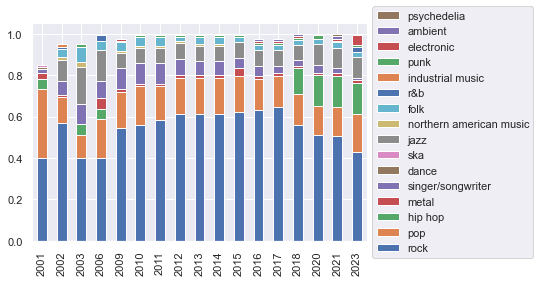

In [16]:
sns.set()
plt.figure(dpi = 300)
df_top_genre_percentage = df_top_genre_percentage.sort_values("2001", ascending = False)
ax = df_top_genre_percentage.T.plot(kind="bar", legend = False, stacked=True)
handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("plots/top_genres.png", dpi = 300, bbox_inches = "tight", pad_inches = 0.5, format = "png")
plt.show()